<a href="https://colab.research.google.com/github/jhonDataScience/Financiero/blob/main/Salud%20Mental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Ruta del archivo en Google Drive
file_path = '/content/drive/My Drive/Colab Notebooks/Indicators_of_Anxiety_or_Depression.csv'

In [10]:
data = pd.read_csv(file_path)

In [11]:
data.head(10)

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,23.2,21.5,25.0,21.5 - 25.0,NaN
5,Symptoms of Depressive Disorder,By Age,United States,60 - 69 years,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,18.4,17.0,19.7,17.0 - 19.7,NaN
6,Symptoms of Depressive Disorder,By Age,United States,70 - 79 years,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,13.6,11.8,15.5,11.8 - 15.5,NaN
7,Symptoms of Depressive Disorder,By Age,United States,80 years and above,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,14.4,9.0,21.4,9.0 - 21.4,NaN
8,Symptoms of Depressive Disorder,By Sex,United States,Male,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,20.8,19.6,22.0,19.6 - 22.0,NaN
9,Symptoms of Depressive Disorder,By Sex,United States,Female,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,26.1,25.2,27.1,25.2 - 27.1,NaN


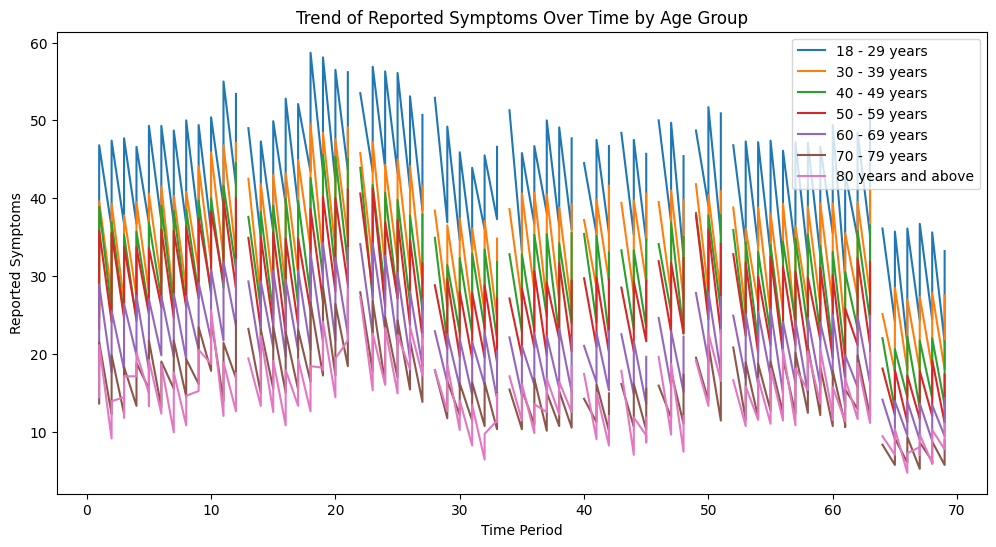

In [14]:
# @title Trend of Reported Symptoms Over Time by Age Group

import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is a pandas DataFrame containing the data

data_age = data[data['Group'] == 'By Age']

plt.figure(figsize=(12, 6))

for subgroup in data_age['Subgroup'].unique():
    subset = data_age[data_age['Subgroup'] == subgroup]
    plt.plot(subset['Time Period'], subset['Value'], label=subgroup)

plt.xlabel('Time Period')
plt.ylabel('Reported Symptoms')
plt.title('Trend of Reported Symptoms Over Time by Age Group')
_ = plt.legend()


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16092 entries, 0 to 16091
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Indicator               16092 non-null  object 
 1   Group                   16092 non-null  object 
 2   State                   16092 non-null  object 
 3   Subgroup                16092 non-null  object 
 4   Phase                   16092 non-null  object 
 5   Time Period             16092 non-null  int64  
 6   Time Period Label       16092 non-null  object 
 7   Time Period Start Date  16092 non-null  object 
 8   Time Period End Date    16092 non-null  object 
 9   Value                   15386 non-null  float64
 10  Low CI                  15386 non-null  float64
 11  High CI                 15386 non-null  float64
 12  Confidence Interval     15386 non-null  object 
 13  Quartile Range          10558 non-null  object 
dtypes: float64(3), int64(1), object(10)
me

In [13]:
missing_values = data.isnull().sum()
missing_values

,0
Indicator,0
Group,0
State,0
Subgroup,0
Phase,0
Time Period,0
Time Period Label,0
Time Period Start Date,0
Time Period End Date,0
Value,706


EDA Visualisations

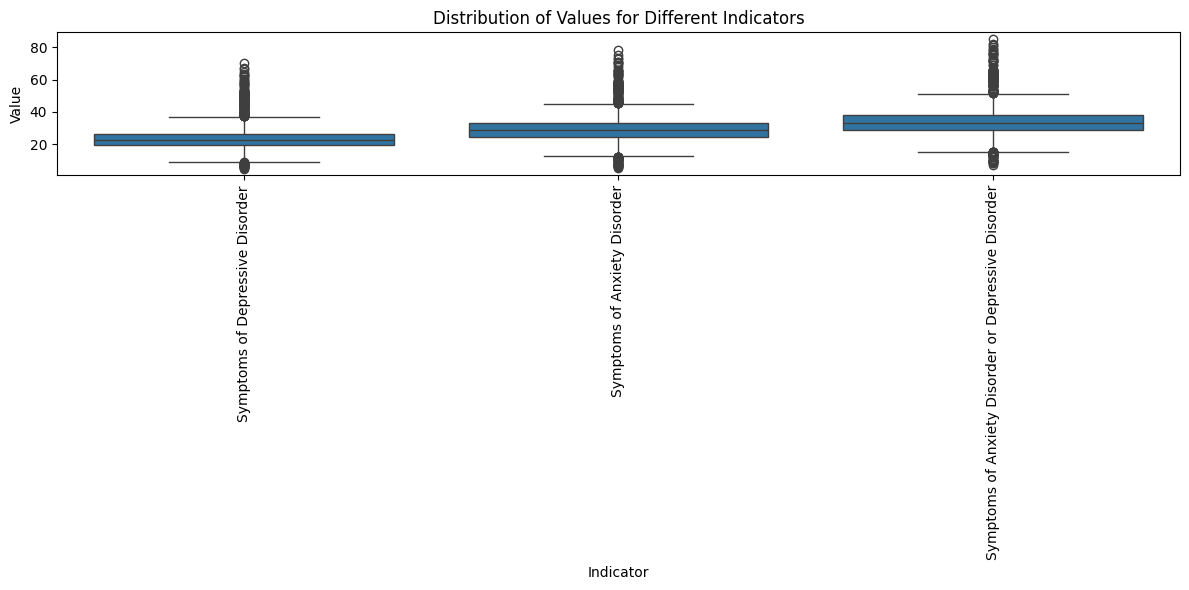

In [17]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of `Value` for Different `Indicators`
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Indicator', y='Value')
plt.xticks(rotation=90)
plt.title('Distribution of Values for Different Indicators')
plt.xlabel('Indicator')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

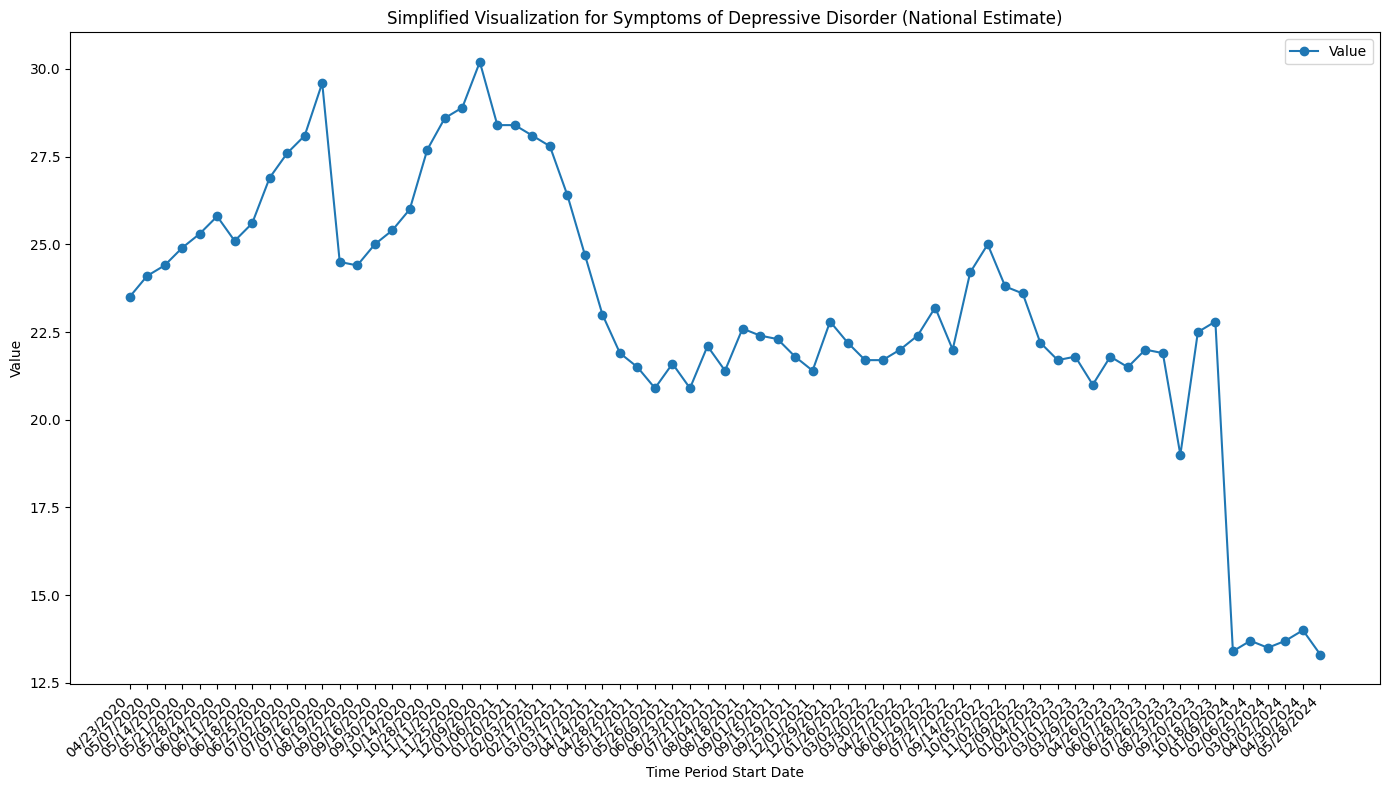

In [18]:
# Drop rows with missing values in the relevant columns
filtered_data = data.dropna(subset=['Value', 'Low CI', 'High CI'])

# Plotting for a specific indicator and group for clarity
indicator_group_data = filtered_data[(filtered_data['Indicator'] == 'Symptoms of Depressive Disorder') &
                                     (filtered_data['Group'] == 'National Estimate')]

# Plotting only the 'Value' over time
plt.figure(figsize=(14, 8))
plt.plot(indicator_group_data['Time Period Start Date'], indicator_group_data['Value'], label='Value', marker='o')
plt.title('Simplified Visualization for Symptoms of Depressive Disorder (National Estimate)')
plt.xlabel('Time Period Start Date')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()

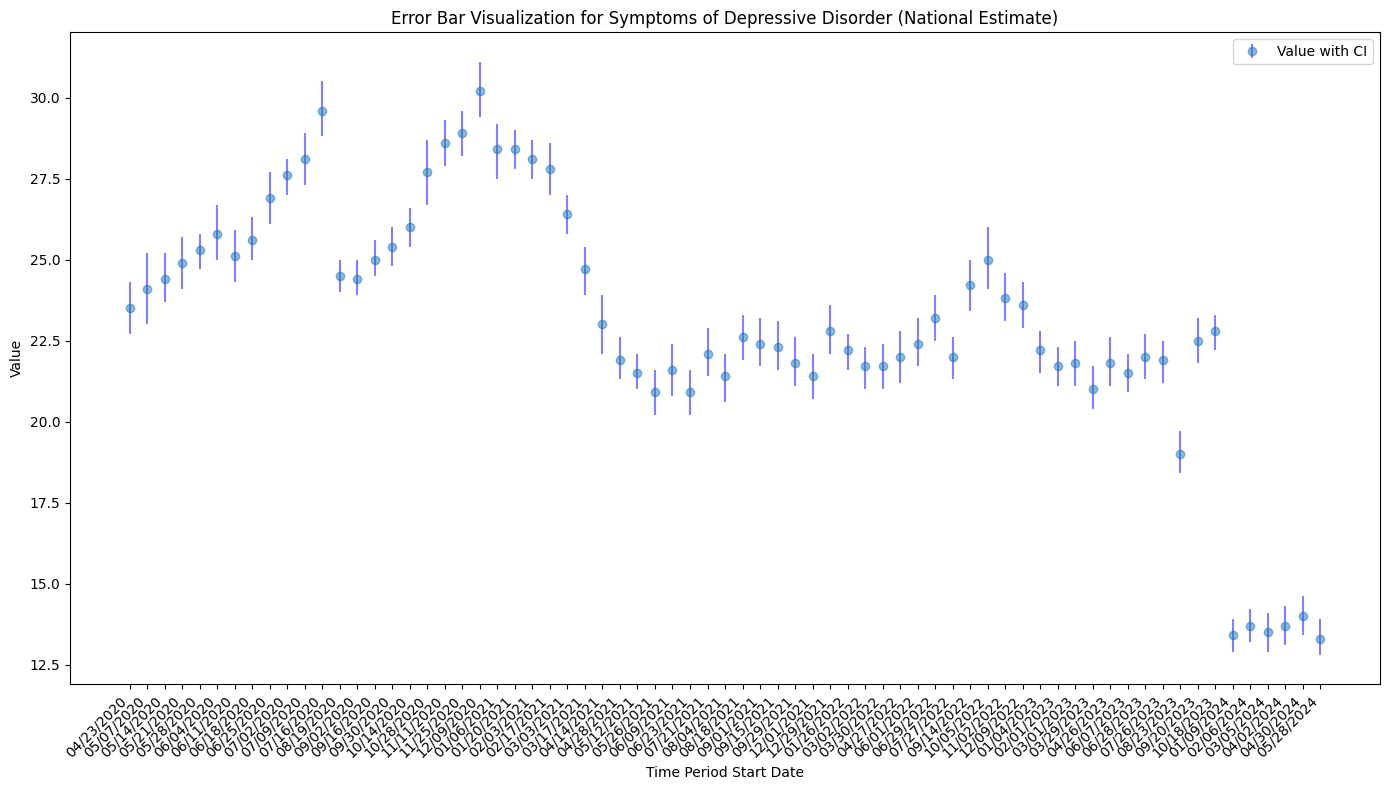

In [19]:
# Visualization with Error Bars
plt.figure(figsize=(14, 8))
plt.errorbar(indicator_group_data['Time Period Start Date'], indicator_group_data['Value'],
             yerr=[indicator_group_data['Value'] - indicator_group_data['Low CI'],
                   indicator_group_data['High CI'] - indicator_group_data['Value']],
             fmt='o', ecolor='b', alpha=0.5, label='Value with CI')
plt.title('Error Bar Visualization for Symptoms of Depressive Disorder (National Estimate)')
plt.xlabel('Time Period Start Date')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()

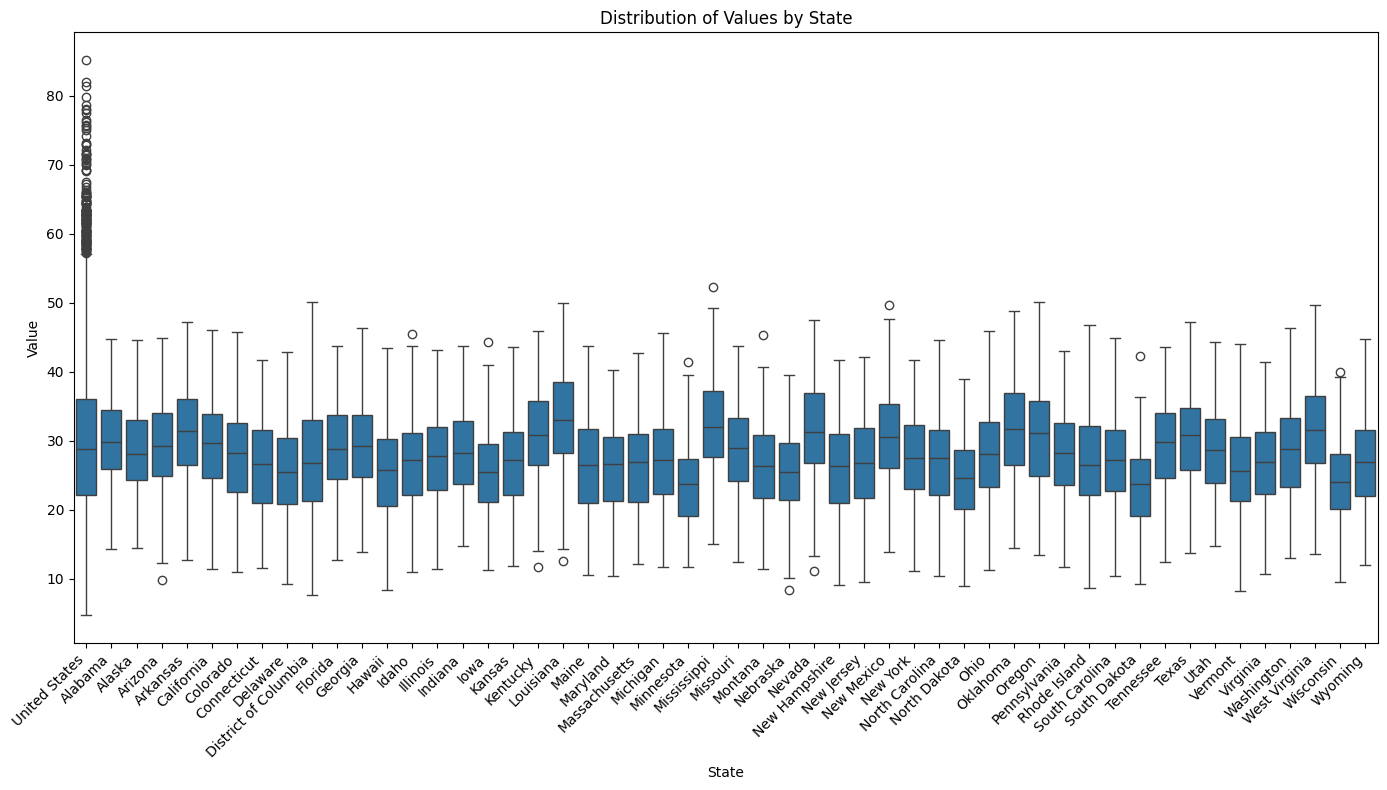

In [20]:
# Distribution of `Value` by State
plt.figure(figsize=(14, 8))
sns.boxplot(data=filtered_data, x='State', y='Value')
plt.xticks(rotation=90)
plt.title('Distribution of Values by State')
plt.xlabel('State')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

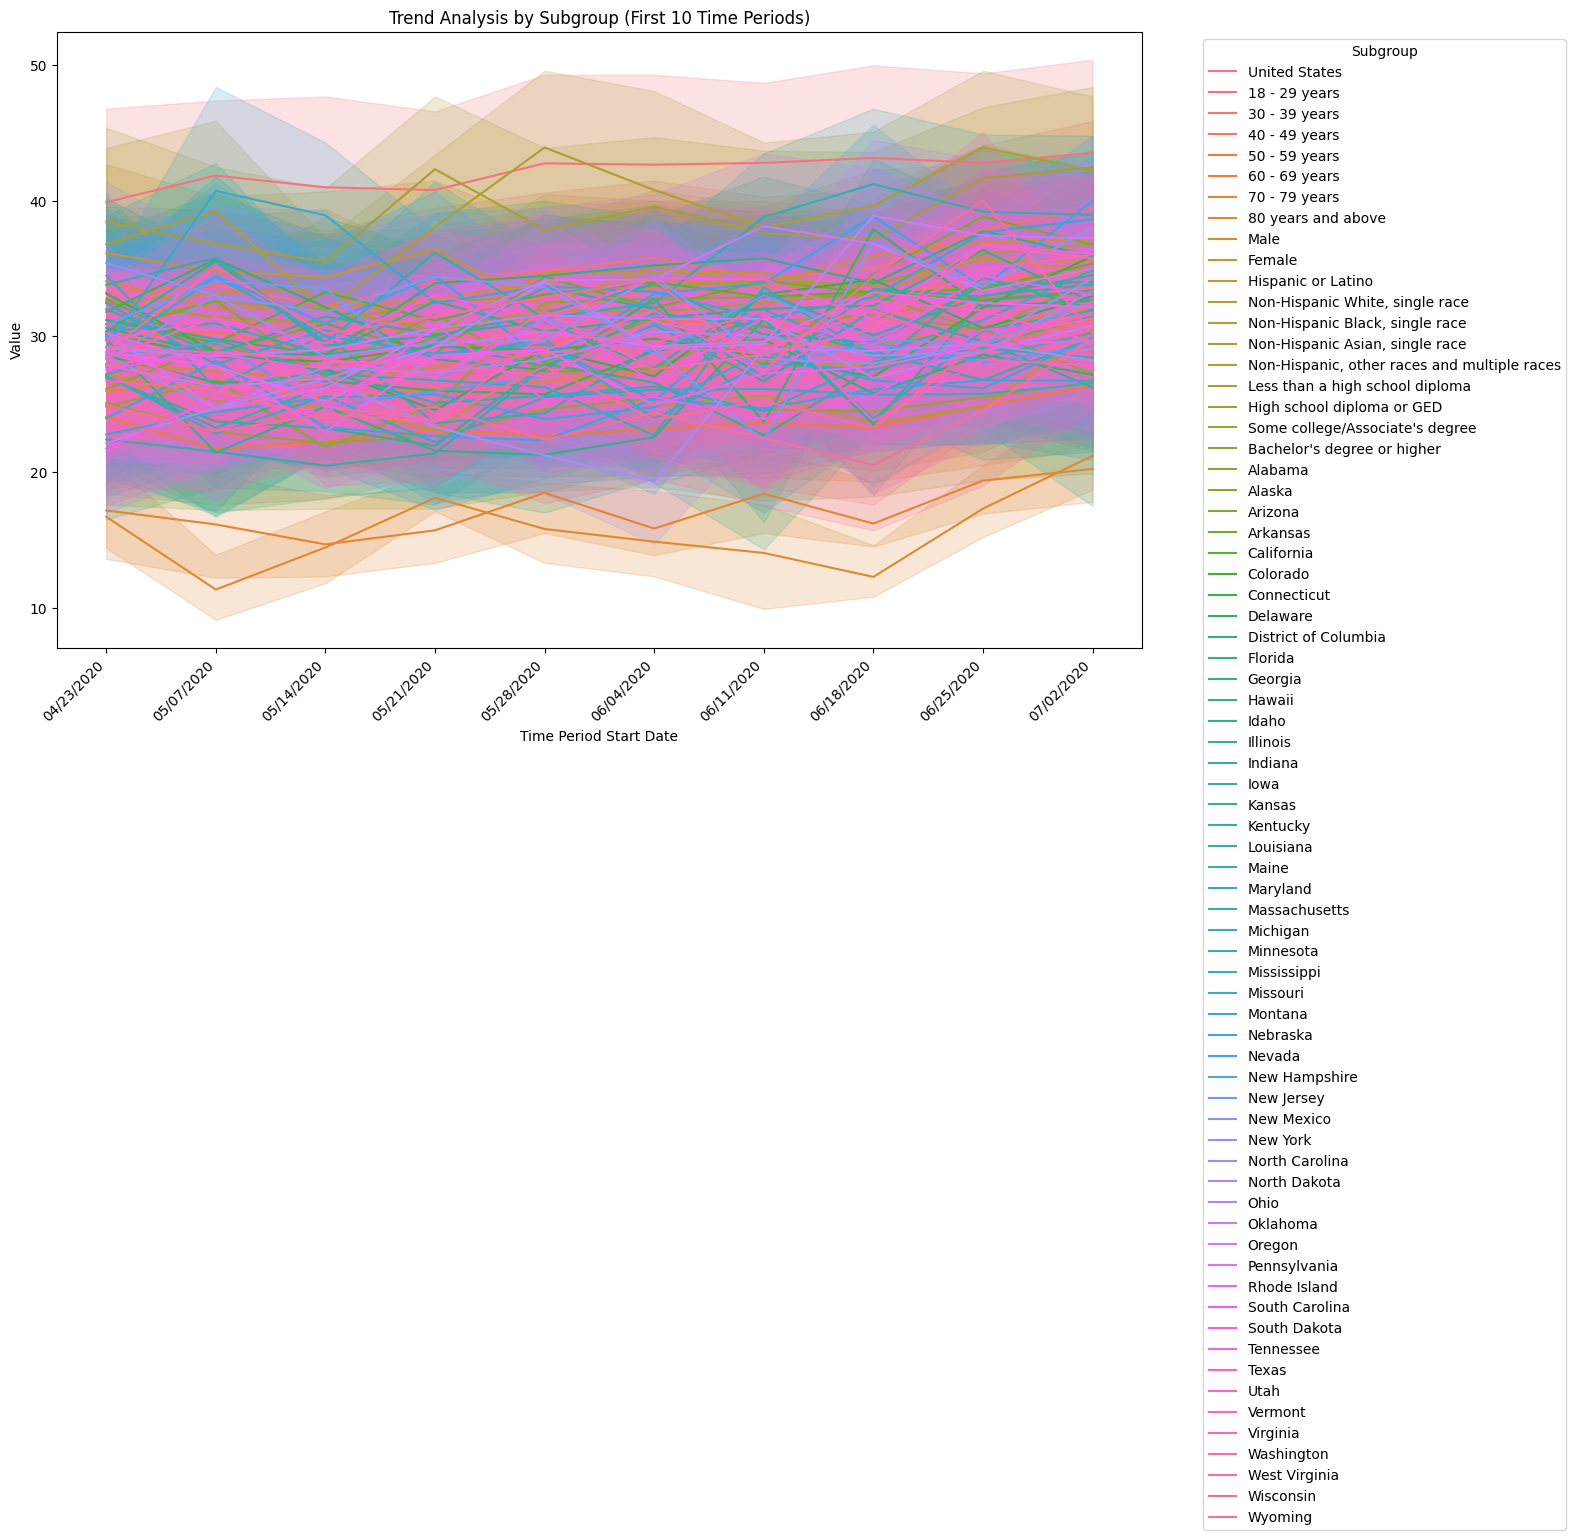

In [21]:
# Filter data for the first 10 time periods to speed up processing
filtered_data_short_period = filtered_data[filtered_data['Time Period'] <= 10]

# Trend Analysis by Subgroup with filtered data
plt.figure(figsize=(14, 8))
sns.lineplot(data=filtered_data_short_period, x='Time Period Start Date', y='Value', hue='Subgroup')
plt.title('Trend Analysis by Subgroup (First 10 Time Periods)')
plt.xlabel('Time Period Start Date')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Value')
plt.legend(title='Subgroup', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### ***Cluster Analysis***

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Drop rows with missing values in the relevant features
data_for_clustering = filtered_data.dropna(subset=['Value', 'Low CI', 'High CI'])

# Select relevant features for clustering
features = ['Value', 'Low CI', 'High CI']
data_for_clustering = data_for_clustering[features]

# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

In [23]:
# Apply k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Add cluster labels to the original data
data_for_clustering['Cluster'] = clusters

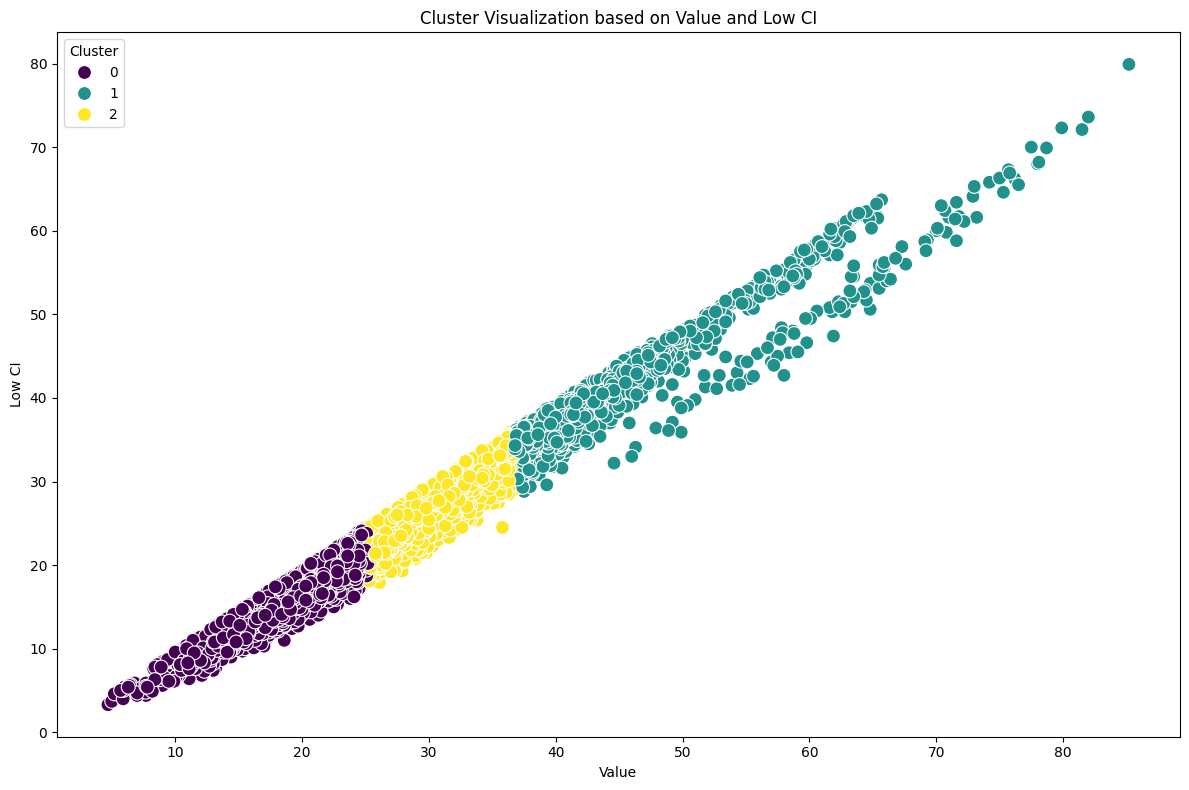

In [24]:
# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data_for_clustering, x='Value', y='Low CI', hue='Cluster', palette='viridis', s=100)
plt.title('Cluster Visualization based on Value and Low CI')
plt.xlabel('Value')
plt.ylabel('Low CI')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()